In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Load and prepare data
df = pd.read_csv('Diabetic.txt', comment='@', header=None)
df.columns = [str(i) for i in range(df.shape[1] - 1)] + ['class']
df = df[df['0'] != 0]  # Remove rows with column '0' equal to 0
X = df.drop(columns=['class']).values
y = df['class'].values.reshape(-1, 1)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

sevenfive = int(len(df) * 0.75)
value_num = sevenfive + int(len(df) * 0.1)

training_set = df.iloc[:sevenfive]
validation_set = df.iloc[sevenfive:value_num]
test_set = df.iloc[value_num:]

X_train = training_set.drop(columns=['class']).values
y_train = training_set['class'].values.reshape(-1, 1)

X_val = validation_set.drop(columns=['class']).values
y_val = validation_set['class'].values.reshape(-1, 1)

X_test = test_set.drop(columns=['class']).values
y_test = test_set['class'].values.reshape(-1, 1)

# Scale training, validation, and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
# Train function
def train(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate=0.1, epochs=1000):
    # Initialize parameters
    input_size = X_train.shape[1]
    hidden_size = 4
    output_size = 1

    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))

    # Store loss and accuracy values for plotting
    loss_history = []
    train_accuracy_history = []
    test_accuracy_history = []

    for epoch in range(epochs):
        m = X_train.shape[0]  # Number of training samples

        # Forward propagation
        Z1 = np.dot(X_train, W1) + b1
        A1 = np.maximum(0, Z1)  # ReLU activation for hidden layer
        Z2 = np.dot(A1, W2) + b2
        A2 = sigmoid(Z2)  # Sigmoid activation for output layer

        # Compute the cost (binary cross-entropy)
        epsilon = 1e-8  # Small value to avoid log(0)
        cost = (-1 / m) * np.sum(y_train * np.log(A2 + epsilon) + (1 - y_train) * np.log(1 - A2 + epsilon))
        loss_history.append(cost)

        # Backward propagation
        dZ2 = A2 - y_train  # Derivative for output layer
        dW2 = (1 / m) * np.dot(A1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * (Z1 > 0)  # Derivative of ReLU is 1 when Z1 > 0, otherwise 0
        dW1 = (1 / m) * np.dot(X_train.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        # Gradient descent update
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        # Validation loss calculation
        Z1_val = np.dot(X_val, W1) + b1
        A1_val = np.maximum(0, Z1_val)
        Z2_val = np.dot(A1_val, W2) + b2
        A2_val = sigmoid(Z2_val)
        val_cost = (-1 / X_val.shape[0]) * np.sum(y_val * np.log(A2_val + epsilon) + (1 - y_val) * np.log(1 - A2_val + epsilon))

        # Training accuracy
        predictions_train = (A2 > 0.5).astype(int)
        train_accuracy = np.mean(predictions_train == y_train)
        train_accuracy_history.append(train_accuracy)

        # Test accuracy (evaluation on test set)
        Z1_test = np.dot(X_test, W1) + b1
        A1_test = np.maximum(0, Z1_test)
        Z2_test = np.dot(A1_test, W2) + b2
        A2_test = sigmoid(Z2_test)
        predictions_test = (A2_test > 0.5).astype(int)
        test_accuracy = np.mean(predictions_test == y_test)
        test_accuracy_history.append(test_accuracy)

        # Print the loss every 100 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {cost:.4f}, Validation Loss: {val_cost:.4f}, Training Accuracy: {train_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%")

    # Plot the training and validation loss over epochs
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), loss_history, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), np.array(train_accuracy_history) * 100, label='Training Accuracy')
    plt.plot(range(epochs), np.array(test_accuracy_history) * 100, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()



Epoch 0, Loss: 0.6931, Validation Loss: 0.6917, Training Accuracy: 48.26%, Test Accuracy: 49.71%
Epoch 10, Loss: 0.6905, Validation Loss: 0.6864, Training Accuracy: 53.49%, Test Accuracy: 49.71%
Epoch 20, Loss: 0.6880, Validation Loss: 0.6831, Training Accuracy: 53.49%, Test Accuracy: 49.71%
Epoch 30, Loss: 0.6724, Validation Loss: 0.6692, Training Accuracy: 53.49%, Test Accuracy: 49.71%
Epoch 40, Loss: 0.6480, Validation Loss: 0.6568, Training Accuracy: 61.74%, Test Accuracy: 64.16%
Epoch 50, Loss: 0.6288, Validation Loss: 0.6538, Training Accuracy: 63.02%, Test Accuracy: 63.01%
Epoch 60, Loss: 0.6092, Validation Loss: 0.6556, Training Accuracy: 67.33%, Test Accuracy: 65.32%
Epoch 70, Loss: 0.5932, Validation Loss: 0.6537, Training Accuracy: 68.49%, Test Accuracy: 65.90%
Epoch 80, Loss: 0.5805, Validation Loss: 0.6544, Training Accuracy: 69.77%, Test Accuracy: 66.47%
Epoch 90, Loss: 0.5690, Validation Loss: 0.6537, Training Accuracy: 70.58%, Test Accuracy: 68.79%
Epoch 100, Loss: 0.55

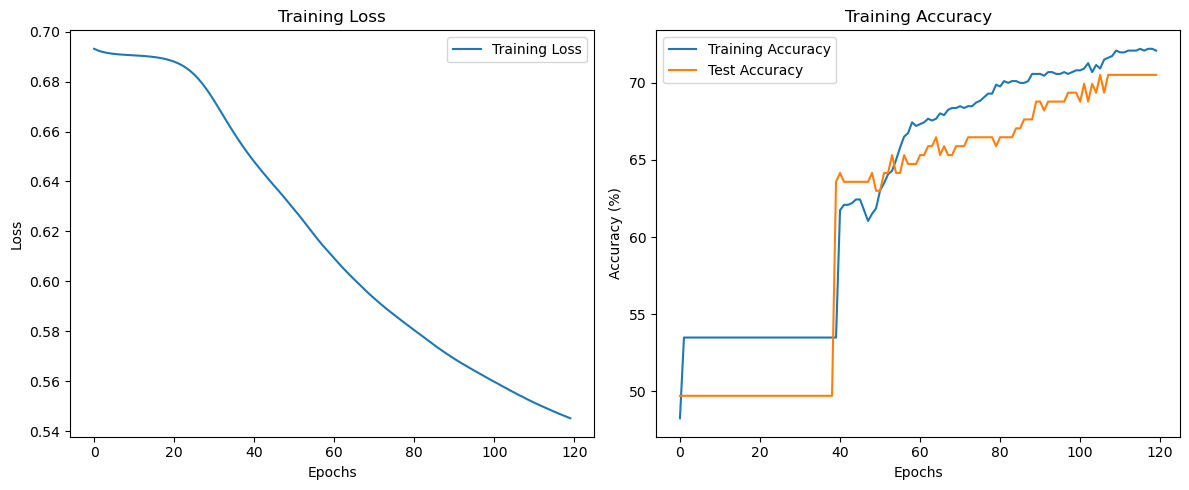

In [5]:

learning_rate = 0.6
epochs = 120
train(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate, epochs)